# CSE144 Homework 1 - Winter 2024

# Assignment Overview
In this homework, we'll engage in standard data preprocessing, construct a linear regression model to estimate song popularity using various attributes like energy, acoustics, and more. We're using the [Song Popularity Dataset](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset) from Kaggle. Additionally, you'll be developing a logistic regression trainer.

# Required Libraries
You're expected to employ NumPy, Pandas, and scikit-learn's `train_test_split()` for this task. Additionally, Matplotlib is provided for plotting training and validation losses.

## Submission
Please submit your completed notebook with the outputs.

## Grading Criteria

Total Points: 72
- Data Preprocessing (12 points)
    - Eliminate null entries (2 points)
    - Identify and remove outliers (5 points)
    - Standardize data (5 points)
- Data Division (10 points)
    - Separating test data (5 points)
    - K-fold division for training and validation (5 points)
- Linear Regression Model (25 points)
    - Mean Squared Error (MSE) calculation (3 points)
    - Gradient computation (5 points)
    - Setting epochs and learning rate (0 points)
    - Initializing theta (3 points)
    - Converting dataframe to NumPy array (3 points)
    - Model training (5 points)
        - Track training and validation losses (2 points)
        - Theta update (3 points)
    - Optimal parameter selection (3 points)
    - Test set evaluation (3 points)
- Logistic Regression Model (25 points)
    - Initialize theta (5 points)
    - Implement gradient descent step (5 points)
    - Create sigmoid function (5 points)
    - Compute cross-entropy loss (5 points)
    - Derivative of cross-entropy loss (5 points)

- Extra Credit (6 points)
    - Use a custom dataset and apply your logistic regression model for training and evaluation. Document your findings.


In [1]:
# It is recommended to use a Python environment version 3.10 or higher
!python --version

Python 3.11.6


In [2]:
%matplotlib inline

In [3]:
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import trange
import random

# Set a fixed random seed for reproducibility
seed = 144
random.seed(seed)
np.random.seed(seed)


<class 'pandas.core.frame.DataFrame'>
Index: 18835 entries, 0 to 18834
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18714 non-null  float64
 1   song_duration_ms  18717 non-null  float64
 2   acousticness      18717 non-null  float64
 3   danceability      18712 non-null  float64
 4   energy            18697 non-null  float64
 5   instrumentalness  18700 non-null  float64
 6   key               18721 non-null  float64
 7   liveness          18695 non-null  float64
 8   loudness          18716 non-null  float64
 9   audio_mode        18715 non-null  float64
 10  speechiness       18727 non-null  float64
 11  tempo             18715 non-null  float64
 12  audio_valence     18709 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

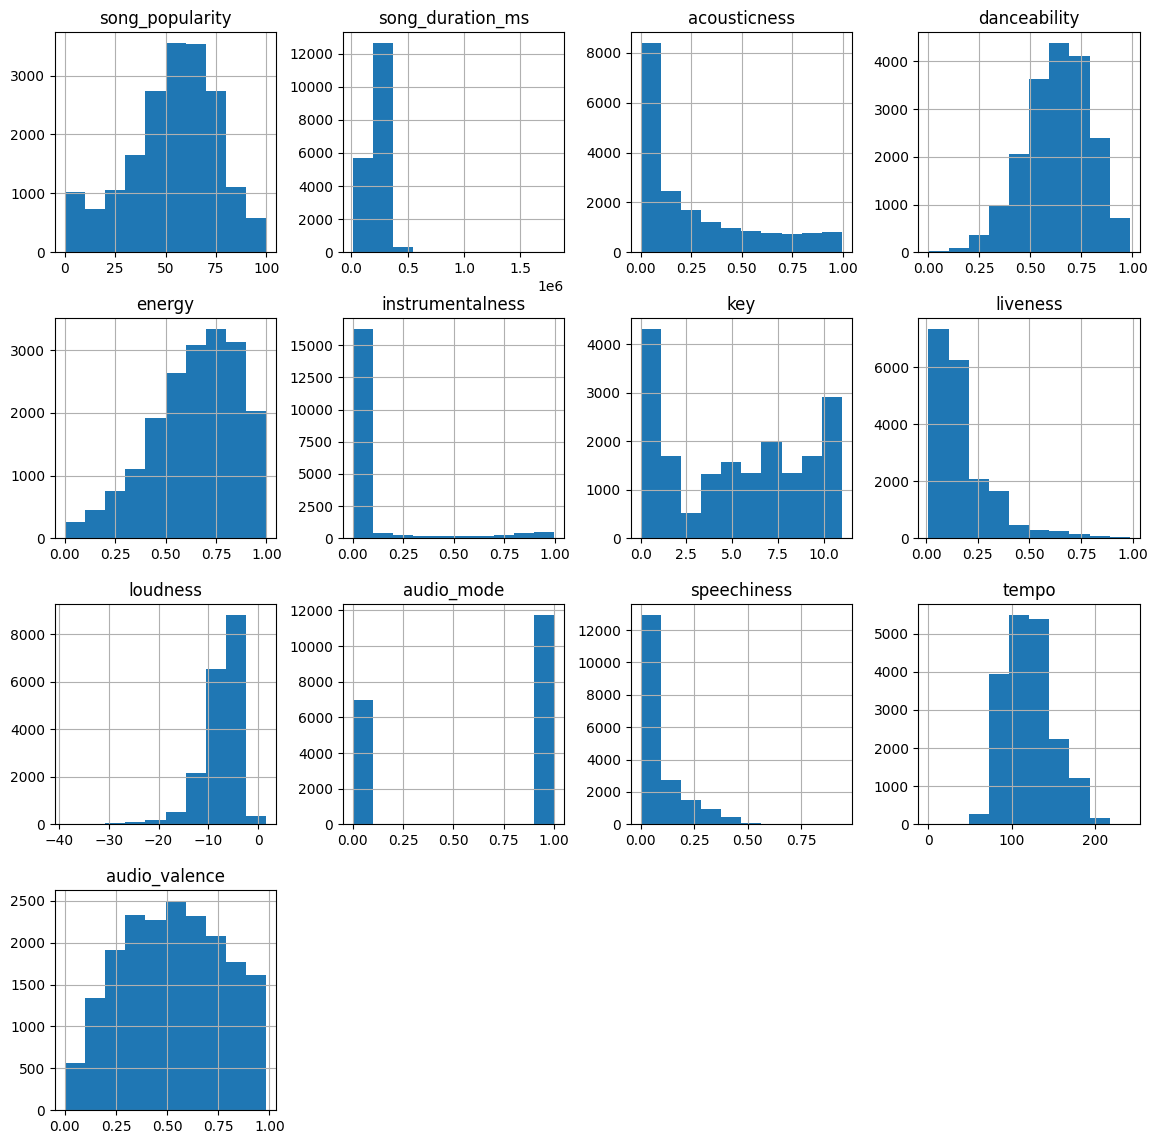

In [4]:
# Importing and Exploring the Dataset
song_data = pd.read_csv("./song_data.csv", index_col=0).drop(["song_name"], axis=1)

# Data Overview
song_data.info()
song_data.hist(figsize=(14, 14))


### Cleaning Data
`song_data.info()` shows that there are some missing values in the dataset. Also, we can see from the histogram that outliers exist for some features. Moreover, the range of different features has a huge gap: most in (0,1), but some are on the order of 1e2, or even 1e5. In the following you need to perform:

1. Eliminate rows with missing data.
2. For 'song_duration_ms' and 'instrumentalness', discard outliers using the interquartile range.
3. Apply Z-score normalization for independent variables and scale 'song_popularity' from [0,100] to [0,1].


In [5]:

# Removing rows with missing values
# ========== INSERT YOUR CODE BELOW ==========
song_data = song_data.dropna()
# song_data.info()
# ========== CODE ENDS HERE ============

'''
Outlier removal for 'song_duration_ms' and 'instrumentalness' using the interquartile range.
Calculate IQR as q3 - q1, and define the range as [q1 - 1.5 * IQR, q3 + 1.5 * IQR].
Utilize the 'quantile()' function for this purpose.
'''
for feature in ['song_duration_ms', 'instrumentalness']:
    # ========== INSERT YOUR CODE BELOW ==========
    q1 = song_data[feature].quantile(0.25)
    q3 = song_data[feature].quantile(0.75)
    IQR = q3 - q1
    song_data = song_data[(song_data[feature] >= q1 - 1.5 * IQR) & (song_data[feature] <= q3 + 1.5 * IQR)]
    # ========== CODE ENDS HERE ============
song_data = song_data.reset_index(drop=True)
print(len(song_data))

'''
Normalize independent features with z-score and scale the dependent 'song_popularity' feature to [0, 1].
Use feature-specific mean and standard deviation.
'''
# ========== INSERT YOUR CODE BELOW ==========
X = song_data.drop(columns=['song_popularity'])
y = song_data["song_popularity"]

for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

song_data.update(X)

song_data["song_popularity"] = (y - y.min()) / (y.max() - y.min())
print(song_data["song_popularity"].head())
# scaled_value = (value - mean) / std 
# ========== CODE ENDS HERE ============


12932
0    0.73
1    0.66
2    0.74
3    0.56
4    0.80
Name: song_popularity, dtype: float64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   12932 non-null  float64
 1   song_duration_ms  12932 non-null  float64
 2   acousticness      12932 non-null  float64
 3   danceability      12932 non-null  float64
 4   energy            12932 non-null  float64
 5   instrumentalness  12932 non-null  float64
 6   key               12932 non-null  float64
 7   liveness          12932 non-null  float64
 8   loudness          12932 non-null  float64
 9   audio_mode        12932 non-null  float64
 10  speechiness       12932 non-null  float64
 11  tempo             12932 non-null  float64
 12  audio_valence     12932 non-null  float64
dtypes: float64(13)
memory usage: 1.3 MB


array([[<Axes: title={'center': 'song_popularity'}>,
        <Axes: title={'center': 'song_duration_ms'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'audio_mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'audio_valence'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

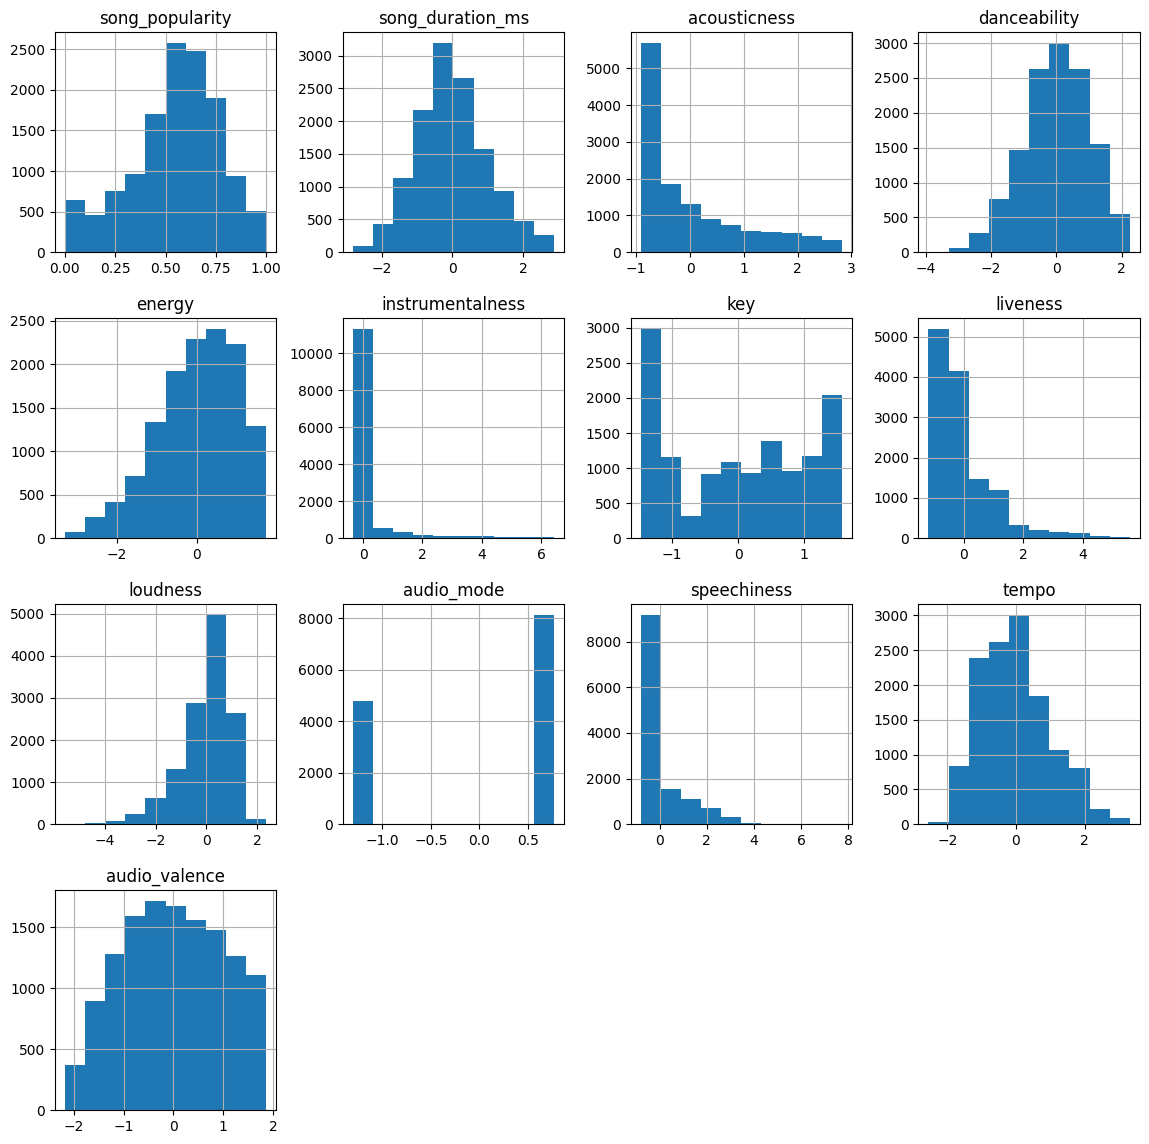

In [6]:
song_data.info()
song_data.hist(figsize=(14, 14))


## Preparing the Dataset

1.Split the dataset into training, validation, and test sets. Allocate 30% for the test set.

2.Apply 5-fold validation on the remaining 70% to create training and validation pairs.


In [7]:

# Function to split the test set
def test_split(song_data, test_size: float = 0.3, seed=seed):
    '''
    Split the dataset into training/validation and test sets using the `train_test_split()` function.
    '''
    # ========== INSERT YOUR CODE BELOW ==========
    y = song_data["song_popularity"]
    X = song_data.drop(columns=['song_popularity'])
    # print(X.head())
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
    # ========== CODE ENDS HERE ============

    return (X_train_val.reset_index(drop=True),
            y_train_val.reset_index(drop=True),
            X_test.reset_index(drop=True),
            y_test.reset_index(drop=True))

# Function to create train-validation pairs
def train_val_split(X_train_val, y_train_val, k=5, seed=seed):
    '''
    Generate k pairs of training and validation sets based on shuffled indices.
    The output is a list of tuples: [(X_train1, y_train1, X_val1, y_val1), ..., (X_traink, y_traink, X_valk, y_valk)]
    '''
    index_shuffle = list(X_train_val.index)
    random.shuffle(index_shuffle)
    index_split_list = [[index_shuffle[i+j] for i in range(0, len(index_shuffle), 5) if i+j < len(index_shuffle)] for j in range(5)]
    train_val_pairs = [(None, None, None, None) for _ in range(k)]
    # ========== INSERT YOUR CODE BELOW ==========

    for i in range(k):
        train_index = []
        val_index = index_split_list[i]
        for j in range(k):
            if i == j:
                continue
            train_index.extend(index_split_list[j])

        X_train = X_train_val.iloc[train_index]
        y_train = y_train_val.iloc[train_index]
        X_val = X_train_val.iloc[val_index]
        y_val = y_train_val.iloc[val_index]

        train_val_pairs[i] = (X_train, y_train, X_val, y_val)
        print(len(X_train), len(X_val))
    
    
    # ========== CODE ENDS HERE ============
    return train_val_pairs

X_train_val, y_train_val, X_test, y_test = test_split(song_data)
# print(len(X_train_val), len(X_test))
train_val_pairs = train_val_split(X_train_val, y_train_val)


7241 1811
7241 1811
7242 1810
7242 1810
7242 1810


## Implementing Linear Regression

 Tip: Prepend a column of 1's to the feature matrix X for easy computation of X * theta. 
 Ensure to add an extra dimension to your feature matrix for shape consistency. 
 Refer to this [illustration](https://cs231n.github.io/linear-classify/#:~:text=Illustration%20of%20the,and%20the%20biases.) for more details.

 Your report should include training, validation, and test losses. Experiment with different learning rates and epoch combinations, and report the best results based on validation loss.


Epoch:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch: 100%|██████████| 500/500 [00:00<00:00, 8121.32it/s]


Final training loss for the best model: 0.02272849362214333
Final validation loss for the best model: 0.022014593084616604
Best model parameters: [ 0.54628936  0.00636941 -0.01707949  0.02860461 -0.02349942 -0.01101176
 -0.00640697 -0.00926317  0.03199208 -0.00180132 -0.00499863 -0.00115724
 -0.02631469]


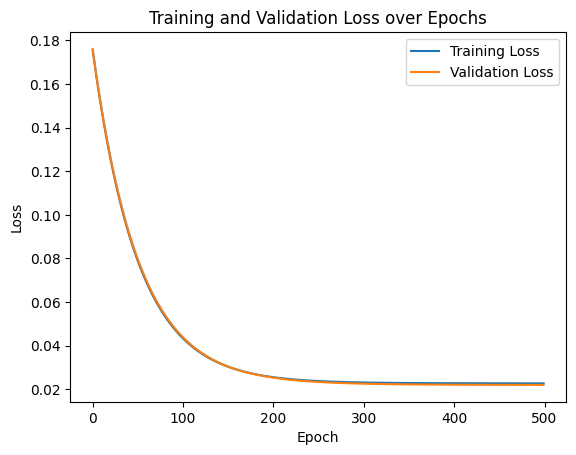

Test set loss: 0.023949731167026013


In [8]:

# Function to calculate MSE
def MSE_loss(prediction: np.ndarray, actual: np.ndarray):
    # ========== INSERT YOUR CODE BELOW ==========
    return np.sum((prediction - actual) ** 2) / (2 * actual.size)
    # ========== CODE ENDS HERE ============

# Function to compute gradient
def gradient(features: np.ndarray, labels: np.ndarray, theta: np.ndarray):
    # ========== INSERT YOUR CODE BELOW ==========
    m = labels.size
    loss = (features @ theta) - labels
    return (1/m) * (features.T @ loss)
    # ========== CODE ENDS HERE ============

# Define the number of epochs and learning rate
# ========== INSERT YOUR CODE BELOW ==========
num_epochs = 500
learning_rate = 0.01
# ========== CODE ENDS HERE ============
k = 5
train_loss_history = [[] for _ in range(k)]
val_loss_history = [[] for _ in range(k)]

theta_optimal = 100.0
optimal_index = None
lowest_loss = 100.0

for i in range(k):
    X_train, y_train, X_val, y_val = train_val_pairs[i]

    # Convert dataframe to numpy array
    # ========== INSERT YOUR CODE BELOW ==========
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_val = X_val.to_numpy()
    y_val = y_val.to_numpy()

    X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    X_val = np.hstack((np.ones((X_val.shape[0], 1)), X_val))
    # ========== CODE ENDS HERE ============

    # Initialize theta
    # ========== INSERT YOUR CODE BELOW ==========
    theta = np.zeros(X_train.shape[1])
    # ========== CODE ENDS HERE ============

    for epoch in trange(num_epochs, desc="Epoch"):
        # Calculate loss and update loss histories
        # ========== INSERT YOUR CODE BELOW ==========
        prediction = X_train @ theta
        loss = MSE_loss(prediction, y_train)
        train_loss_history[i].append(loss)
        # ========== CODE ENDS HERE ============

        # Parameter update
        # ========== INSERT YOUR CODE BELOW ==========
        theta -= learning_rate * gradient(X_train, y_train, theta)
        # ========== CODE ENDS HERE ============

    # Validate and find the best parameters, storing them in theta_optimal and optimal_index
    # ========== INSERT YOUR CODE BELOW ==========
        prediction_val = X_val @ theta
        loss_val = MSE_loss(prediction_val, y_val)
        val_loss_history[i].append(loss_val)

        if loss_val < lowest_loss:
            theta_optimal = theta
            optimal_index = i
            lowest_loss = loss_val
    # ========== CODE ENDS HERE ============

print(f"Final training loss for the best model: {train_loss_history[optimal_index][-1]}")
print(f"Final validation loss for the best model: {val_loss_history[optimal_index][-1]}")
print("Best model parameters:", theta_optimal)

# print(len(train_loss_history[optimal_index]))
# print(len(val_loss_history[optimal_index]))

plt.plot(np.arange(num_epochs), train_loss_history[optimal_index], label="Training Loss")
plt.plot(np.arange(num_epochs), val_loss_history[optimal_index], label="Validation Loss")
plt.title("Training and Validation Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Test set evaluation
# ========== INSERT YOUR CODE BELOW ==========
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
prediction_test = X_test @ theta_optimal
test_loss = MSE_loss(prediction_test, y_test)
# ========== CODE ENDS HERE ============
print(f"Test set loss: {test_loss}")


## Logistic Regression Task

In this exercise, you are tasked with completing several functions within the `LogisticRegressionTrainer` class. It's important to remember that `gradient_descent_step()` should update parameters without returning any values. Additionally, the regularization term must be included in the `cross_entropy_loss()` function.

Tasks to complete:
* Initialize `theta` - Worth 5 points
* Implement `gradient_descent_step` function - Worth 5 points
* Define `sigmoid` function - Worth 5 points
* Code `cross_entropy_loss` function - Worth 5 points
* Write `cross_entropy_loss_derivative` function - Worth 5 points

In [9]:
class LogisticRegressionTrainer:
    def __init__(
        self,
        num_features: int,
        learning_rate: float = 1e-2,
        num_epochs: int = 500,
        lambd: float = 0.0,
    ) -> None:
        """Constructor for logistic regression trainer."""
        self.lambd = lambd
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = num_features
        self.train_loss_history = []
        self.val_loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []
        self.test_loss = None
        self.test_acc = None

        # Please initialize the model's weights. Any initialization strategy is acceptable.
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        self.theta = np.zeros(self.num_features)
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def gradient_descent_step(self, x: np.ndarray, y: np.ndarray) -> None:
        """
        Execute one iteration of gradient descent.

        Args:
            x: Feature matrix.
            y: Label vector.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        gradient = self.cross_entropy_loss_derivative(x, y)
        self.theta -= self.learning_rate * gradient
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Transform logits into probabilities.

        Args:
            z: Logits.

        Returns:
            Probabilities as a vector (or scalar if the input is scalar).
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        return 1 / (1 + np.exp(-z))
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss(self, pred: np.ndarray, target: np.ndarray) -> float:
        """
        Compute binary cross-entropy loss, including regularization.

        Args:
            pred: Predictions (as probabilities).
            target: Actual labels.

        Returns:
            Loss as a scalar value.
        """
        assert pred.shape == target.shape
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        m = target.size
        loss = (-1/m) * np.sum(target * np.log(pred) + (1-target) * np.log(1 - pred))
        regularization = (self.lambd / (2 * m)) * np.sum(self.theta[1:] ** 2)
        return loss + regularization
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

    def cross_entropy_loss_derivative(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Compute gradient of loss function with respect to theta, including L2 regularization.

        Args:
            x: Feature vectors.
            y: True labels.

        Returns:
            Gradient vector, parallel to theta.
        """
        # ========== YOUR IMPLEMENTATION STARTS HERE ==========
        m = x.shape[0]
        prediction = self.sigmoid(x @ self.theta)
        gradient = (1 / m) * (x.T @ (prediction - y))
        regularization = (self.lambd / m) * np.hstack([0, self.theta[1:0]])
        return gradient + regularization
        # ========== YOUR IMPLEMENTATION ENDS HERE ==========

## Additional Challenge (6 points):

Implement logistic regression on a unique dataset of your choice. Train and evaluate your model, and report the outcomes.




### Outcomes:

First code block is an implementation of my LogisticRegressionTrainer class.
Second code block uses sklearn's LogisticRegression function for comparison to first code block.

I use sklearns train_test_split and StandardScaler functions to preprocess the data.

From the output, it can be observed that the train loss decreases and accuracy increases as the number of epochs increase.
This is the theta value decreasing over time as our program performs gradient descent over the training data sets. It can also be observed that tweaking the number of epochs and learning rate may result in a higher accuracy as outputted in the second code block.

Epoch 0: Train Loss = 0.6743421218370507, Train Accuracy = 0.9321608040201005
Epoch 50: Train Loss = 0.33848775733713765, Train Accuracy = 0.9522613065326633
Epoch 100: Train Loss = 0.2603203161887851, Train Accuracy = 0.9547738693467337
Epoch 150: Train Loss = 0.22263392643367275, Train Accuracy = 0.9547738693467337
Epoch 200: Train Loss = 0.19945920647907164, Train Accuracy = 0.957286432160804
Epoch 250: Train Loss = 0.18340064765525715, Train Accuracy = 0.9623115577889447
Epoch 300: Train Loss = 0.17145571053887798, Train Accuracy = 0.9623115577889447
Epoch 350: Train Loss = 0.16213770788211987, Train Accuracy = 0.964824120603015
Epoch 400: Train Loss = 0.15461326295139471, Train Accuracy = 0.964824120603015
Epoch 450: Train Loss = 0.14837457093270603, Train Accuracy = 0.9623115577889447
Epoch 499: Train Loss = 0.14319081417110913, Train Accuracy = 0.964824120603015


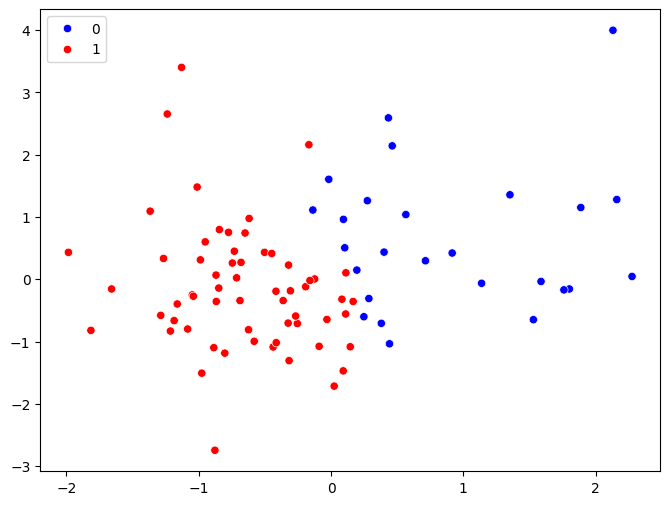

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def compute_accuracy(predictions, labels):
    """
    Compute the accuracy of the model.
    
    Args:
        predictions: A numpy array of model predictions.
        labels: A numpy array of actual labels.
    
    Returns:
        The accuracy of the model as a float.
    """
    preds_correct = predictions.round() == labels
    accuracy = np.mean(preds_correct)
    return accuracy


data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

num_features = X_train.shape[1]
model = LogisticRegressionTrainer(num_features)

for epoch in range(model.num_epochs):
    model.gradient_descent_step(X_train, y_train)

    train_prediction = model.sigmoid(X_train @ model.theta)
    train_loss = model.cross_entropy_loss(train_prediction, y_train)
    train_accuracy = compute_accuracy(train_prediction, y_train)

    model.train_loss_history.append(train_loss)
    model.train_acc_history.append(train_accuracy)

    if epoch % 50 == 0 or epoch == model.num_epochs - 1:
        print(f"Epoch {epoch}: Train Loss = {train_loss}, Train Accuracy = {train_accuracy}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.show()


Accuracy = 0.9767441860465116


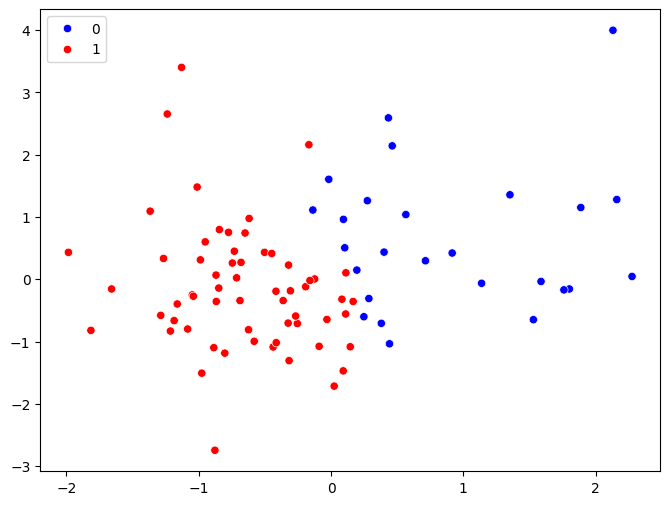

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy = {accuracy}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.show()
